In [1]:
import pandas as pd

df = pd.read_csv('Document from George.csv')
df['Order date'] = pd.to_datetime(df['Order date'])
df['Delivery date'] = pd.to_datetime(df['Delivery date'])
#changed the dates to python datetime
df['time_diff_days'] = ( df['Delivery date'] - df['Order date']) / pd.Timedelta(days=1)

#difference between the order and delivery in minutes
df['time_diff'] = ( df['Delivery date'] - df['Order date'])
df

,Unnamed: 0,Warehouse,Order date,Delivery date,Customer,Zipcode,time_diff_days,time_diff
0,0,Butler,2021-02-09 10:49:00,2021-02-11 12:40:00,12392,15017,2.077083,2 days 01:51:00
1,1,Butler,2021-02-12 08:59:00,2021-02-15 16:12:00,12392,15017,3.300694,3 days 07:13:00
2,2,Washington,2021-02-12 09:01:00,2021-02-15 16:15:00,12392,15017,3.301389,3 days 07:14:00
3,3,McKees Rocks,2021-02-13 07:45:00,2021-02-15 16:16:00,12392,15017,2.354861,2 days 08:31:00
4,5,Butler,2021-02-15 21:58:00,2021-02-16 16:50:00,12392,15017,0.786111,0 days 18:52:00
...,...,...,...,...,...,...,...,...
9475,10472,Washington,2022-11-12 18:43:00,2022-11-12 19:01:00,288530,15217,0.012500,0 days 00:18:00
9476,10473,Pittsburgh Mills,2022-11-12 19:48:00,2022-11-12 19:48:00,227364,15112,0.000000,0 days 00:00:00
9477,10474,Butler,2022-11-12 20:02:00,2022-11-12 20:02:00,270991,15216,0.000000,0 days 00:00:00
9478,10475,Pittsburgh Mills,2022-11-12 20:09:00,2022-11-12 20:09:00,98234,15217,0.000000,0 days 00:00:00


# 1. total number of orders from each zip code permonth

In [23]:
pd.options.display.max_columns = 4000
out = pd.crosstab(df['Zipcode'], pd.PeriodIndex(df['Order date'], freq='M'))
out

col_0,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11
Zipcode,,,,,,,,,,,,,,,,,,,,,,
15007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15017,8,4,6,3,14,5,3,4,2,0,4,21,18,17,17,18,19,16,15,6,10,2
15031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15044,0,0,9,9,8,12,8,12,11,16,19,13,11,13,16,22,27,12,27,20,26,26
15055,0,0,0,0,0,0,0,0,0,2,1,0,1,0,1,0,1,2,6,4,2,1
15057,0,0,0,0,8,3,1,1,2,2,0,1,0,0,1,2,13,3,13,11,6,2
15063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# 2. percentage of customer returns within a week, month and year

In [22]:
vf=df[df.Customer.duplicated(keep=False)]

sr = vf.groupby('Customer').head(2)

our = (vf.groupby('Customer', as_index=False)['Order date'].agg(lambda x: (x.iloc[-1] - x.iloc[0]).total_seconds()/ 60 ).query('`Order date` != 0'))
week = []
month = []
year = []
more_time = []
col = out['Order date'].tolist()
for i in col:
    if 0 <= i <= 10080:#week
        week.append(i)
    elif 10081 <= i <= 43800:#month
        month.append(i)
    elif 43801 <= i <= 525600:#year
        year.append(i)
    elif  i > 525600:#year
        more_time.append(i)
    
all_customers = len(df.Customer.unique())
return_customer  = len(out)
print('percentage of overall return customers',round(return_customer/all_customers *100),'%')
print('percentage of customers that returned within a week',round(len(week)/all_customers *100,1),'%')
print('percentage of customers that returned within a month',round(len(month)/all_customers *100,1),'%')
print('percentage of customers that returned within a year',round(len(year)/all_customers *100,1),'%')
print('percentage of customers that returned over a year',round(len(more_time)/all_customers *100,1),'%')

percentage of overall return customers 55 %
percentage of customers that returned within a week 8.2 %
percentage of customers that returned within a month 10.0 %
percentage of customers that returned within a year 31.6 %
percentage of customers that returned over a year 4.7 %


# 3. percentage of customer that never came back

In [4]:
sf = df.drop_duplicates(subset = 'Customer',keep = False)

print('percentage of customers that never came back',round(len(sf) / len(df.Customer.unique()) * 100),'%')
#percentage of customers that only ordered once

percentage of customers that never came back 45 %


In [5]:
print('average delivery time for customers that came back',round(vf.time_diff_days.mean(),1),'days')

average delivery time for customers that came back 3.2 days


In [6]:
print('average delivery time for customers that never came back',round(sf.time_diff_days.mean(),1),'days')

average delivery time for customers that never came back 3.1 days


In [66]:
print("Conclusion: There isn't much correlation because the average delivery time for customers that returned is almost the same as those that didn't")

Conclusion: There isn't much correlation because the average delivery time for /n customers that returned is almost the same as those that didn't


# 4. how fast do orders get delivered by zipcode

## average delivery time for each zipcode

In [17]:
pd.options.display.max_rows = 4000
wf = df.groupby('Zipcode')['time_diff_days'].mean().round(2)
wf = pd.DataFrame(wf)
print('the average delivery time is in days')

wf

the average delivery time is in days


,time_diff_days
Zipcode,
15007,1.78
15010,32.17
15017,2.46
15031,0.65
15035,2.99
15044,3.51
15055,3.15
15057,3.39
15063,5.05


## how fast do orders get delivered by zipcode per month

In [20]:
a = df.groupby([df.Zipcode,df['Order date'].dt.month])['time_diff_days'].mean().round(1)
b = pd.DataFrame(a)
c = b.reset_index()
d = c.rename(columns = {'Order date':'month','time_diff_days':'average time to deliver(days)'})
d

,Zipcode,month,average time to deliver(days)
0,15007,11,1.8
1,15010,10,32.2
2,15017,1,2.8
3,15017,2,2.5
4,15017,3,2.3
5,15017,4,2.4
6,15017,5,2.8
7,15017,6,2.2
8,15017,7,2.6
9,15017,8,2.1


# 5. from what warehouse do each zipcode have the most deliveries

In [268]:


s = df.groupby('Zipcode')['Warehouse'].apply(lambda x: x.value_counts().index[0]).reset_index()
s

,Zipcode,Warehouse
0,15007,Boardman
1,15010,Beaver Falls
2,15017,Washington
3,15031,Washington
4,15035,Pittsburgh Mills
5,15044,Washington
6,15055,Pittsburgh Mills
7,15057,Washington
8,15063,Washington
9,15068,Beaver Falls


# 6. how fast does each zipcode grow with number of orders 

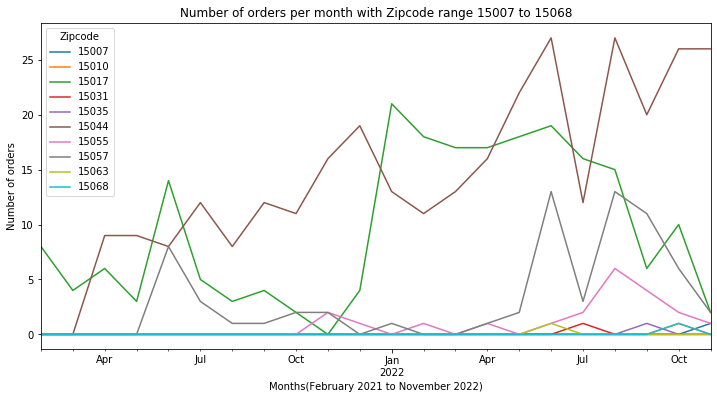

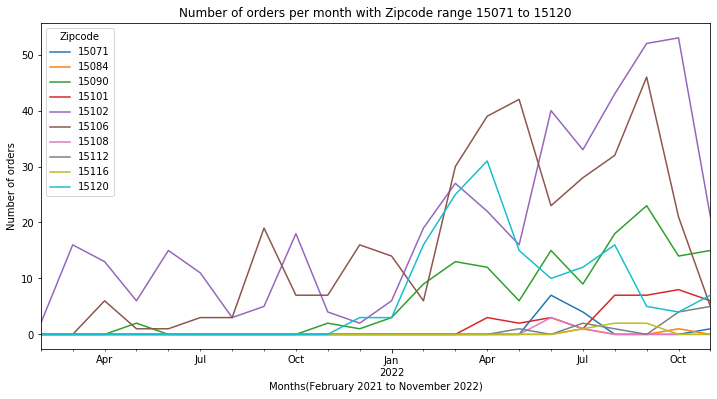

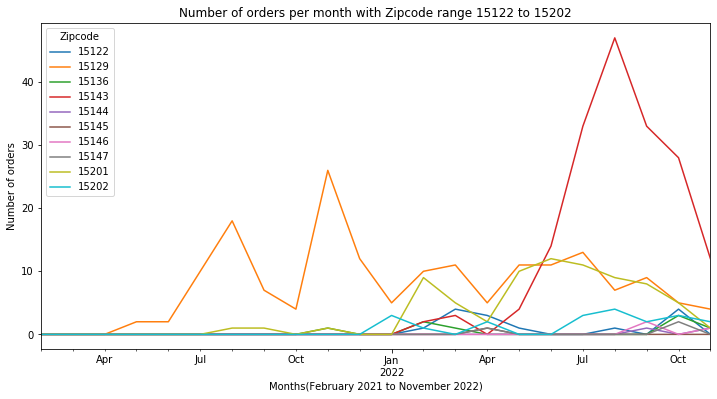

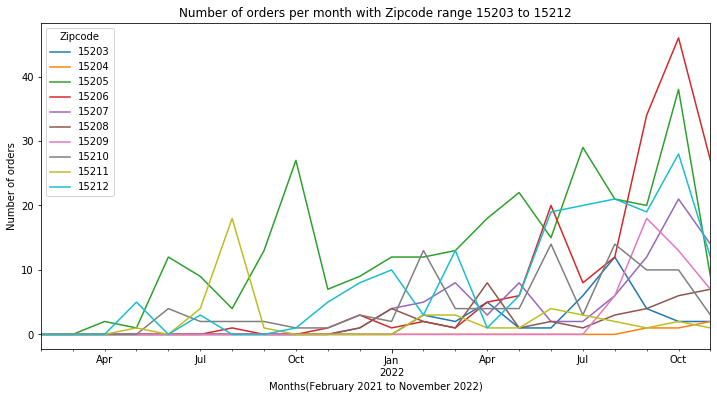

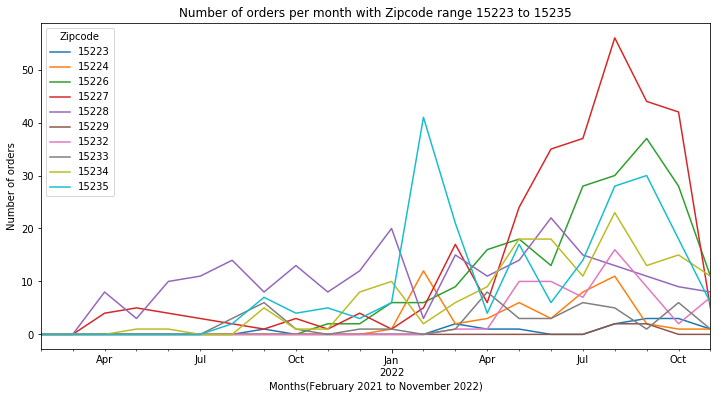

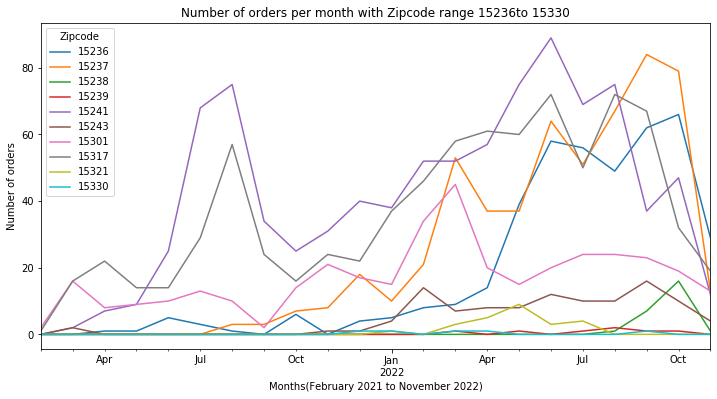

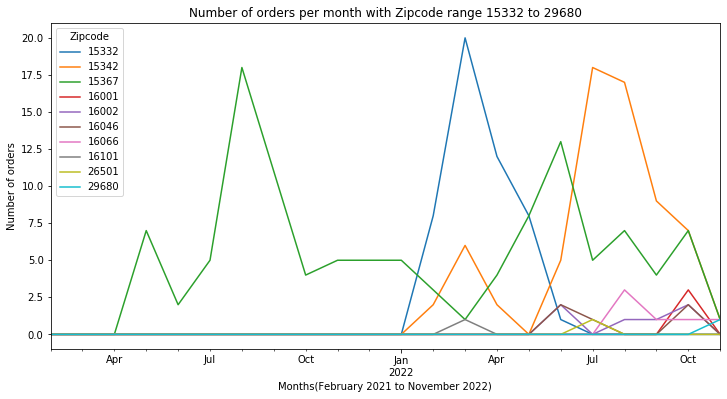

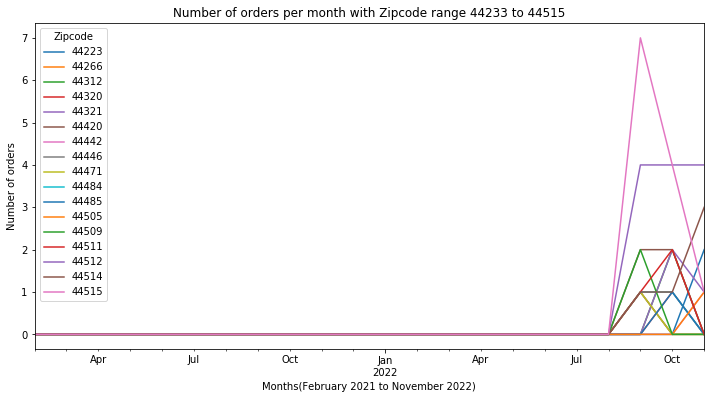

In [59]:
hil = out.transpose()

hil10 = hil.iloc[:, 0:10]
hil10.plot(title = 'Number of orders per month with Zipcode range 15007 to 15068',figsize=(12,6),ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')

hil20 = hil.iloc[:, 10:20]
hil20.plot(title = 'Number of orders per month with Zipcode range 15071 to 15120',figsize=(12,6),ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')

hil30 = hil.iloc[:, 20:30]
hil30.plot(title = 'Number of orders per month with Zipcode range 15122 to 15202',figsize=(12,6),ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')

hil40 = hil.iloc[:, 30:40]
hil40.plot(title = 'Number of orders per month with Zipcode range 15203 to 15212',figsize=(12,6),ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')

hil50 = hil.iloc[:, 50:60]
hil50.plot(title = 'Number of orders per month with Zipcode range 15223 to 15235',figsize=(12,6),ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')

hil60 = hil.iloc[:, 60:70]
hil60.plot(title = 'Number of orders per month with Zipcode range 15236to 15330',figsize=(12,6),ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')

hil70 = hil.iloc[:, 70:80]
hil70.plot(title = 'Number of orders per month with Zipcode range 15332 to 29680',figsize=(12,6),ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')

hil80 = hil.iloc[:, 80:]
hil80.plot(title = 'Number of orders per month with Zipcode range 44233 to 44515',figsize=(12,6),ylabel = 'Number of orders',xlabel = 'Months(February 2021 to November 2022)')



# 7. Is there a season factor?

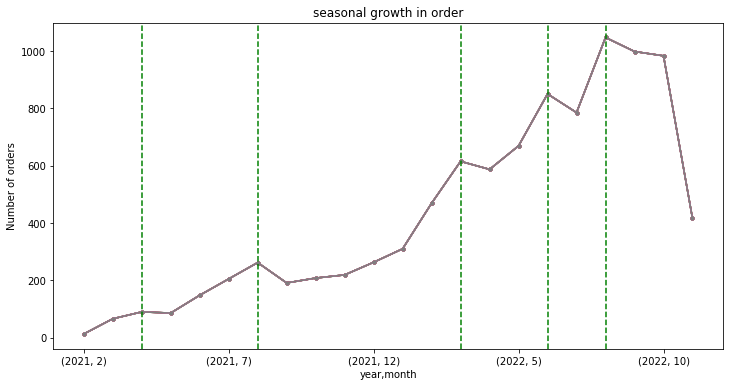

In [106]:
qf = df.groupby([df['Order date'].dt.year.rename('year'), df['Order date'].dt.month.rename('month')]).agg({'count'})
ax = qf.plot(legend=False,ylabel = 'Number of orders',title = 'seasonal growth in order',figsize=(12,6),style='.-')
xposition = [2,6, 13,16,18]
for xc in xposition:
    plt.axvline(x=xc, color='green', linestyle='--')
plt.show() 

### From the plot above we can see noticeable rise right before a decline in the number of orders on April 2021, August 2021, March 2022, June 2022 and August 2022. Number of orders made generally increases during the summer time and peaks when close to the end of summer.

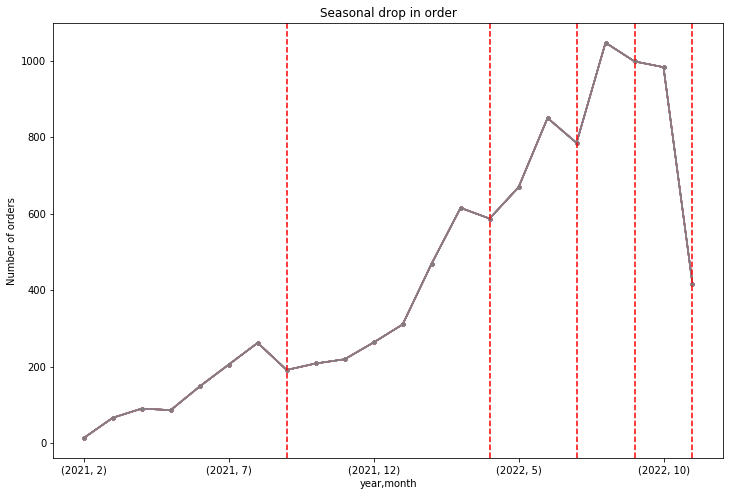

In [103]:
ay = qf.plot(legend=False,ylabel = 'Number of orders',title = 'Seasonal drop in order',figsize=(12,8),style='.-')
xposition = [7, 14,17,19,21]
for xc in xposition:
    plt.axvline(x=xc, color='red', linestyle='--')
plt.show() 

# 8. from which warehouse do orders get delivered faster

In [65]:
wf = df.groupby('Warehouse')['time_diff_days'].mean().round(1)
wf = pd.DataFrame(wf)
wf = wf.sort_values(by=['time_diff_days'], ascending=True)
wf.head(7)

,time_diff_days
Warehouse,
McKees Rocks,2.6
Washington Big Box,2.6
BD to MR,2.8
Washington,2.8
Mckees Rocks,3.0
Pittsburgh Mills,3.1
Butler,3.3
